In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [9]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install xgboost

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

## Exploratory Data Analysis

In [13]:
#loading the data

data = pd.read_csv(r"./Data/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

In [14]:
print(f"Dataset Shape : {data.shape}")

Dataset Shape : (3150, 5)


In [15]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [16]:
#Column Names

print(f"Feature Names : {data.columns.values}")

Feature Names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [17]:
#Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [19]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [20]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


The length column is a new generated column to store the length of verified_reviews for that record.

In [21]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}")#Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}")#Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}")

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [22]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

# Analyzing 'rating' column

This column refers to the rating of the variation given by the user

In [23]:
len(data['rating'])

3150

In [24]:
#Distinct values if 'rating' and its count

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


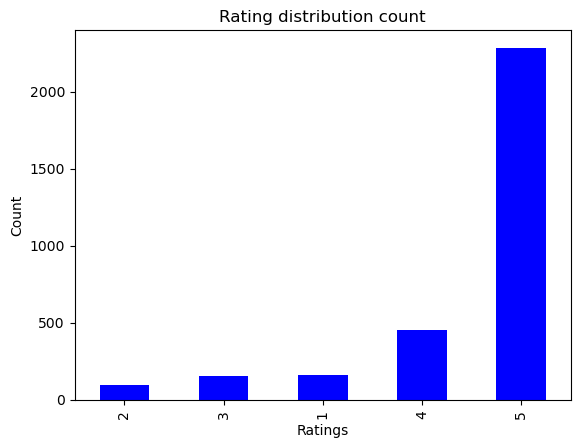

In [25]:
#Bar plot to visualize the total counts of each rating

data['rating'].value_counts().sort_values().plot.bar(color = 'blue')
plt.title('Rating distribution count')
plt.xlabel("Ratings")
plt.ylabel('Count')
plt.show()

In [26]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
5    72.57
4    14.44
1     5.11
3     4.83
2     3.05
Name: rating, dtype: float64


### Let's plot a graph

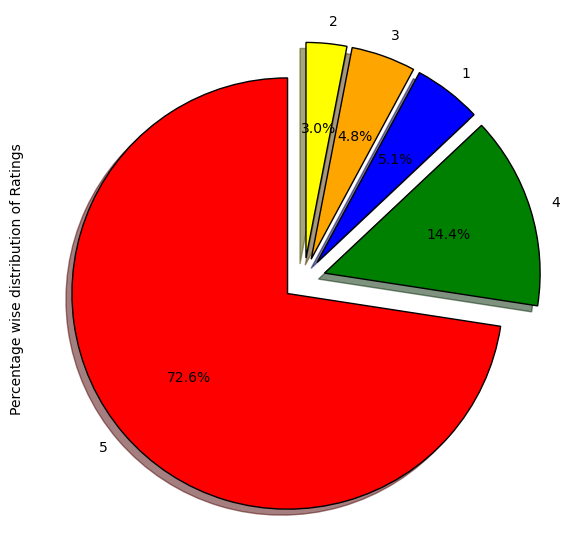

In [27]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue', 'orange', 'yellow')
wp = {'linewidth' : 1, 'edgecolor':'black'}
tags = data['rating'].value_counts()/data.shape[0]
explode = (0.1,0.1,0.1,0.1,0.1)
tags.plot(kind = 'pie', autopct="%1.1f%%", shadow = True, colors = colors, startangle = 90, wedgeprops = wp, explode = explode, label = 'Percentage wise distribution of Ratings')
from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format = "png")

### Analyzing the 'feedback' column 

### This column refers to the feedback of the verified review

In [28]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
1    2893
0     257
Name: feedback, dtype: int64


### There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

## feedback value = 0

In [29]:
#Extracting the 'verifying_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [30]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


### From the above 2 examples we can see that feedback 0 is negative review and 1 is positive review

Let's plot the feedback value count in a bar graph

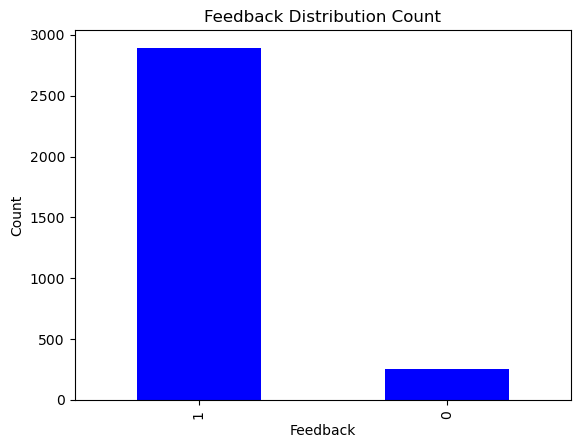

In [31]:
#Bar Graph to visualize the total counts of eaach feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback Distribution Count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [32]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
1    91.84
0     8.16
Name: feedback, dtype: float64


Feedback Distribution
  
  ● 91.84% reviews are positive
  ● 8.16% reviews are negative

<AxesSubplot:ylabel='Percentage wise distribution of Feedbacks'>

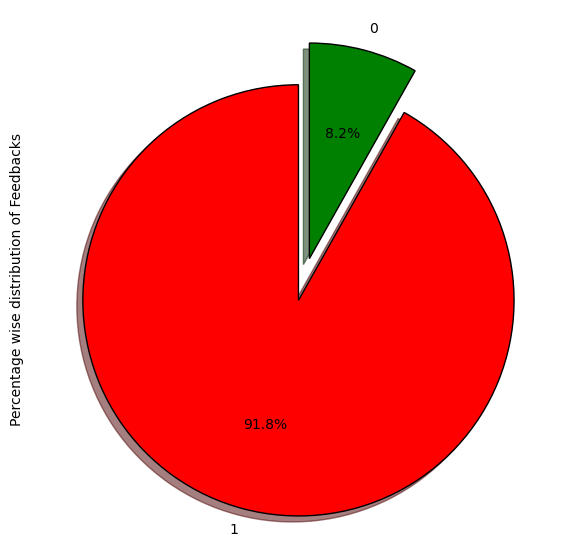

In [33]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth' : 1, 'edgecolor':'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode = (0.1,0.1)

tags.plot(kind = 'pie', autopct="%1.1f%%", shadow = True, colors = colors, startangle = 90, wedgeprops = wp, explode = explode, label = 'Percentage wise distribution of Feedbacks')

Let's see the 'rating' values for different values of 'feedback'

In [34]:
#feedback - 0
data[data['feedback']==0]['rating'].value_counts()

1    161
2     96
Name: rating, dtype: int64

In [35]:
#feedback - 1
data[data['feedback']==1]['rating'].value_counts()

5    2286
4     455
3     152
Name: rating, dtype: int64

### If rating of a review is 1 or 2 then the feedbaack is 0 (negative) nd if the rating is 3, 4 or 5 then the feedback is 1 (positive).

## Analyzing variation column
### This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric, etc

In [36]:
print(f"Variation Value Count: \n{data['variation'].value_counts()}")

Variation Value Count: 
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64


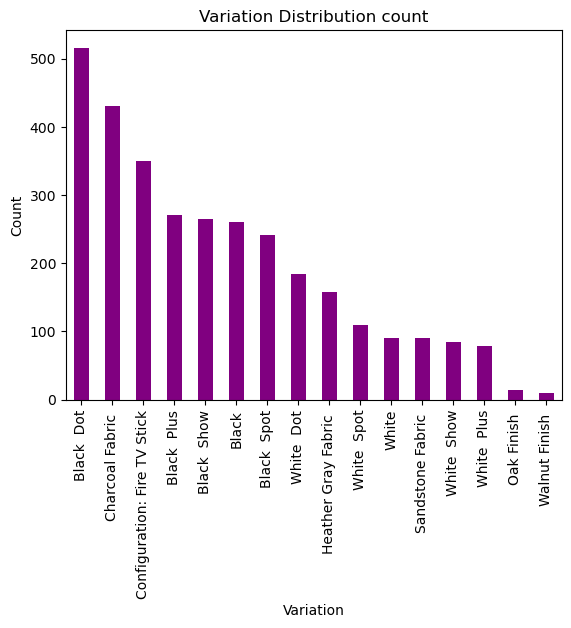

In [37]:
# Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'purple')
plt.title('Variation Distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [38]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
Black  Dot                      16.38
Charcoal Fabric                 13.65
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.41
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.98
White  Spot                      3.46
White                            2.89
Sandstone Fabric                 2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: variation, dtype: float64


Mean rating according to variation

In [39]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.142857
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Let's analyze the above ratings

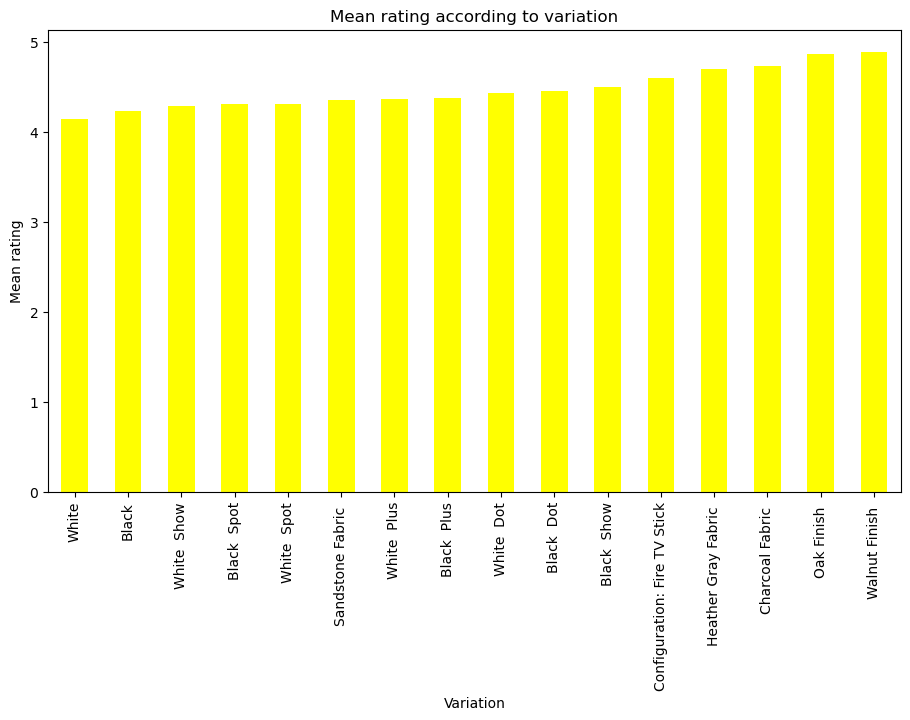

In [40]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'yellow', figsize = (11,6))
plt.title('Mean rating according to variation')
plt.xlabel('Variation')
plt.ylabel("Mean rating")
plt.show()

## Analyzing 'verified_reviews' column

This column contains the textual review given by the user for a variation for the product.

In [41]:
data['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

In [42]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


[Text(0.5, 1.0, 'Distribution of length of review')]

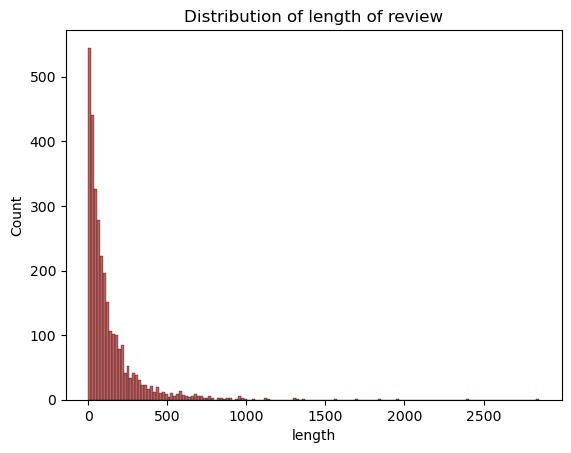

In [43]:
sns.histplot(data['length'], color = 'brown').set(title = 'Distribution of length of review')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

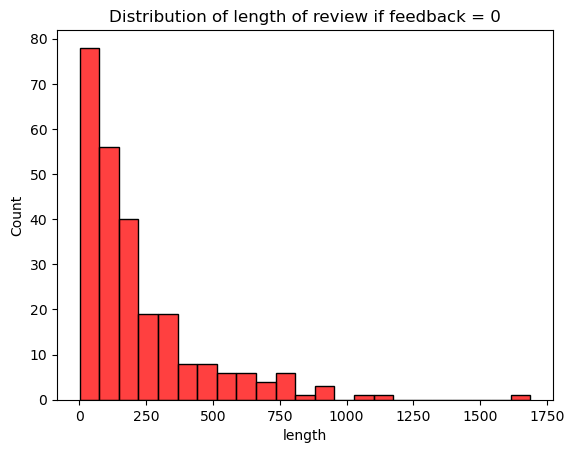

In [44]:
sns.histplot(data[data['feedback']==0]['length'], color = 'red').set(title = 'Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

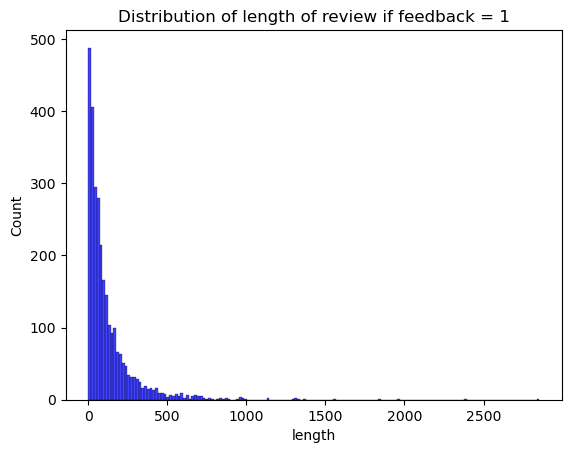

In [45]:
sns.histplot(data[data['feedback']==1]['length'], color = 'blue').set(title = 'Distribution of length of review if feedback = 1')

### Length wise mean rating

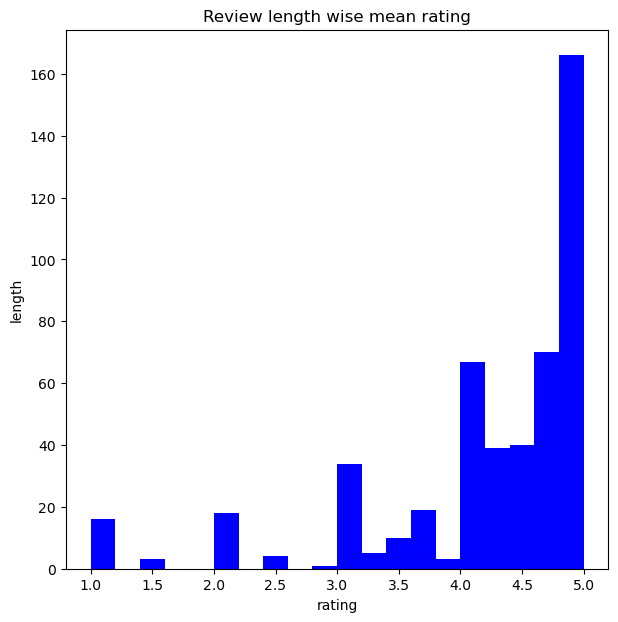

In [46]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize = (7,7), bins = 20)
plt.title('Review length wise mean rating')
plt.xlabel('rating')
plt.ylabel('length')
plt.show()

In [47]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)

## What is Wordcloud?
 A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

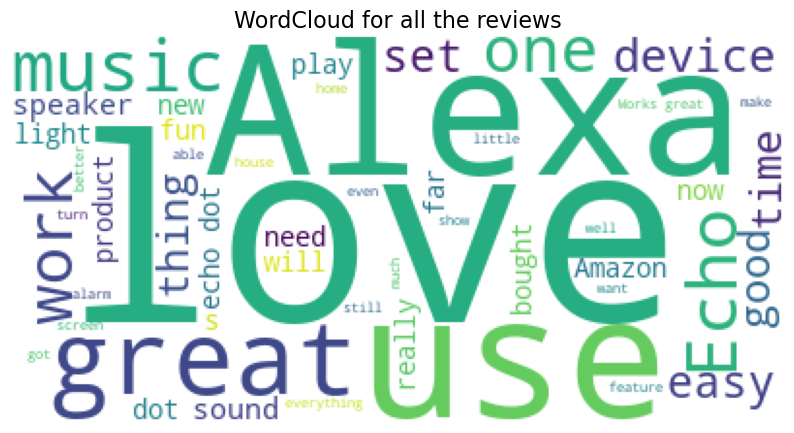

In [48]:
#Combine all the reviews
reviews = " ".join([review for review in data['verified_reviews']])

#Initialize wordcloud object
wc = WordCloud(background_color = 'white', max_words = 50)

#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('WordCloud for all the reviews', fontsize = 16)
plt.axis('off')
plt.show()

Let's find the unique words in each feedback category

In [49]:
#Combine all reviews for each feedback category and splitting them into individual words
negative_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
negative_reviews = negative_reviews.lower().split()

positive_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
positive_reviews = positive_reviews.lower().split()

#Finding words from reviews wwhich are present in that feedback category only
unique_negative = [x for x in negative_reviews if x not in positive_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in positive_reviews if x not in negative_reviews]
unique_positive = " ".join(unique_positive)

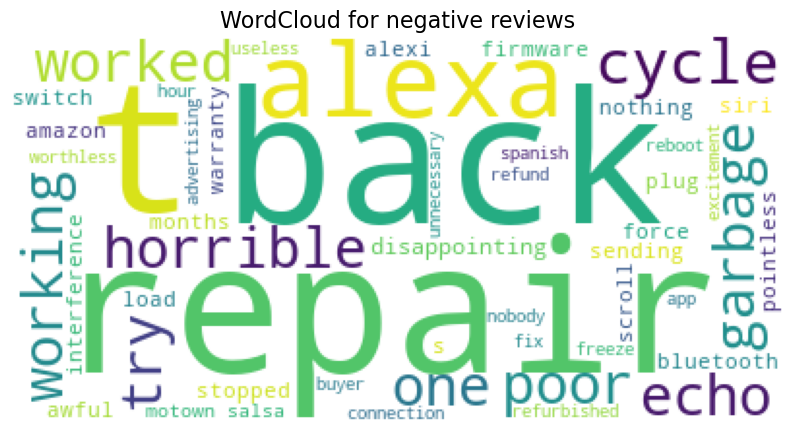

In [50]:
#Initialize wordcloud object
wc = WordCloud(background_color = 'white', max_words = 50)

#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('WordCloud for negative reviews', fontsize = 16)
plt.axis('off')
plt.show()

Negative words can be seen in the above word cloud - garbage, disappointing, pointless, horrible, useless, etc.

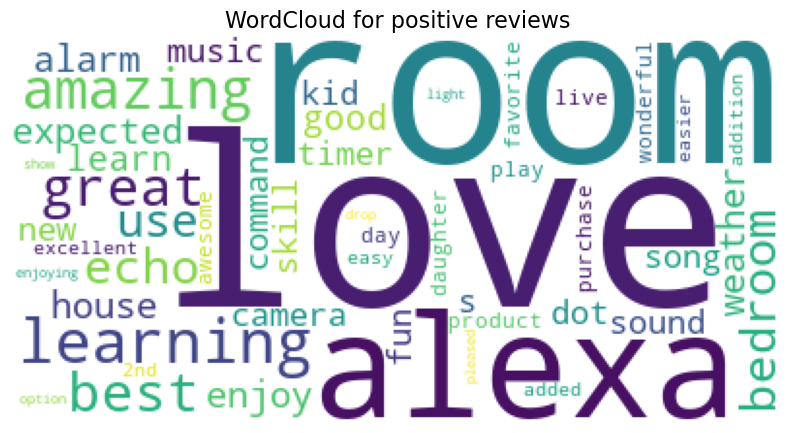

In [51]:
#Initialize wordcloud object
wc = WordCloud(background_color = 'white', max_words = 50)

#Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('WordCloud for positive reviews', fontsize = 16)
plt.axis('off')
plt.show()

Positive words can be seen in the above word cloud - love, great, enjoy, best, amazing, etc.

# Preprocessing and Modelling

To build the corpus from the 'verified_reviews' we perform the following -
    
    1. Replace any non alphabet characters with a space
    2. Convert to lower case and split into words
    3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [52]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)

“Count Vectorizer” and “Bag of Words” are concepts used in Natural Language Processing (NLP) to convert text data into numerical form that can be understood by machine learning algorithms12.

Count Vectorizer: This is a technique used to convert a collection of text documents into a matrix of token counts. It tokenizes the text (splits the text into words) and counts the occurrence of each word in the text. The output is a sparse representation of these counts.

Bag of Words (BoW): This is a representation of text that describes the occurrence of words within a document or a set of documents (corpus). It involves two things: A vocabulary of known words and a measure of the presence of known words. It’s called a “bag” of words because it discards most of the structure of the text, like the order of words, and just counts how often each word occurs. It does not consider the context of the word in the document.

## Using Count Vectorizer to ccreate bag of words 

In [53]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and Y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [54]:
#Saving the Count Vectorizer
pickle.dump(cv, open('Models/countVectorizer.pkl', 'wb'))

In [55]:
#Checking the shape of X and y

print(f"X shape: {X.shape}")
print(f"Y shape: {y.shape}")

X shape: (3150, 2500)
Y shape: (3150,)


In [56]:
#Splitting data into train and test set with 30% data with testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2205, 2500)
y train: (2205,)
X test: (945, 2500)
y test: (945,)


In [57]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


We will scale X_train and X_test so that all the values are between 0 and 1

In [58]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

In [59]:
#Saving the scaler model

pickle.dump(scaler, open("Models/scaler.pkl", 'wb'))

## Random Forest

In [60]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [61]:
#Accuracy of the model on training and testing data

print("Training Accuracy: ", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy: ", model_rf.score(X_test_scl, y_test))

Training Accuracy:  0.9941043083900227
Testing Accuracy:  0.9407407407407408


In [62]:
#Predicting on the test set

y_preds = model_rf.predict(X_test_scl)

In [63]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds) 

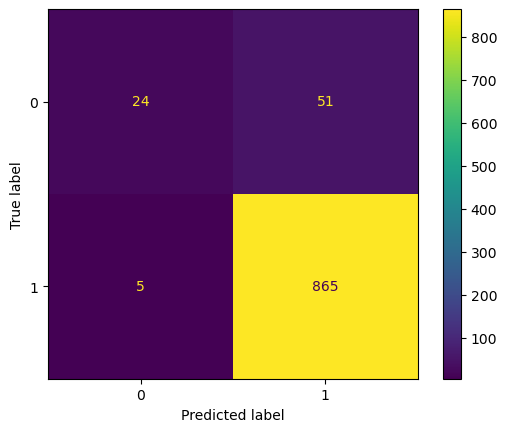

In [64]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

K-Fold Cross Validation

In [65]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9347079391197038
Standard Variance : 0.011772603984295384


In [66]:
#Saving the XGBoost Classifier
pickle.dump(model_rf, open('Models/model_rf.pkl', 'wb'))

 ## XgBoost

In [67]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
#Accuracy of the model on training and testing data

print("Training Accuracy: ", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy: ", model_xgb.score(X_test_scl, y_test)) 

Training Accuracy:  0.9700680272108844
Testing Accuracy:  0.9343915343915344


In [69]:
y_preds = model_xgb.predict(X_test)

In [70]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 25  50]
 [ 10 860]]


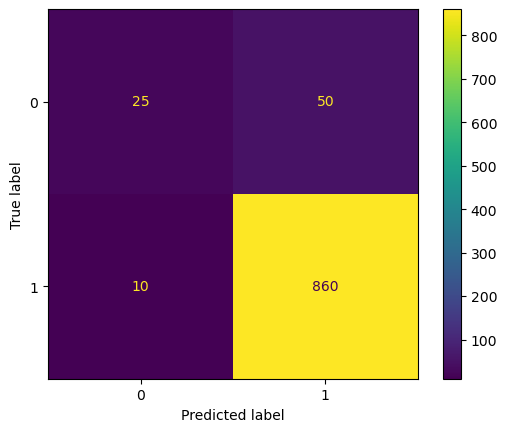

In [71]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

In [72]:
#Saving the XGBoost Classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

## Decision Tree Classifier

In [73]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [74]:
#Accuracy of the model on training and testing data

print("Training Accuracy: ", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy: ", model_dt.score(X_test_scl, y_test)) 

Training Accuracy:  0.9941043083900227
Testing Accuracy:  0.9079365079365079


In [75]:
y_preds = model_dt.predict(X_test)

In [76]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 38  37]
 [ 93 777]]


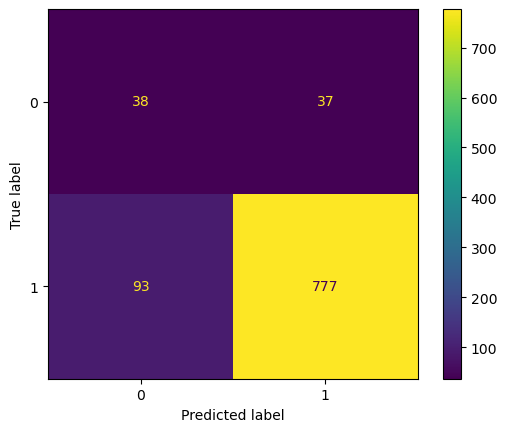

In [77]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()